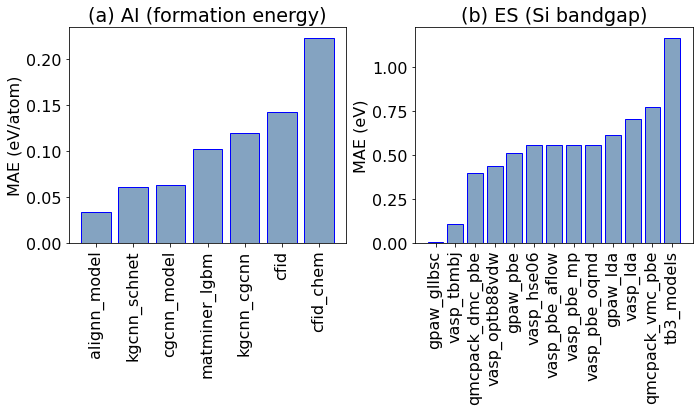

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from jarvis_leaderboard.rebuild import get_metric_value,get_results
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS.values())
colors=np.repeat([0.1, 0.1, 0.1, 0.1],10)

the_grid = GridSpec(1, 2)
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,6))

plt.subplot(the_grid[0, 0])
names,vals=get_results(bench_name='AI-SinglePropertyPrediction-formation_energy_peratom-dft_3d-test-mae.csv.zip')
plt.bar(np.arange(len(vals)),vals,color=(0.2, 0.4, 0.6, 0.6),edgecolor='blue')
plt.xticks(np.arange(len(vals)),names,rotation=90)
plt.ylabel('MAE (eV/atom)')
plt.title('(a) AI (formation energy)')

plt.subplot(the_grid[0, 1])
names,vals=get_results(bench_name='ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip')
#plt.bar(np.arange(len(vals)),vals,color=colors[:len(vals)], edgecolor='blue')
plt.bar(np.arange(len(vals)),vals,color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
plt.xticks(np.arange(len(vals)),names,rotation=90)
plt.ylabel('MAE (eV)')
plt.title('(b) ES (Si bandgap)')

plt.tight_layout()
plt.show()

In [48]:
colors[:len(vals)]

['#acc2d9',
 '#56ae57',
 '#b2996e',
 '#a8ff04',
 '#69d84f',
 '#894585',
 '#70b23f',
 '#d4ffff',
 '#65ab7c',
 '#952e8f',
 '#fcfc81',
 '#a5a391',
 '#388004']

In [53]:
colors[:len(vals)]

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

In [14]:
import glob
ai_form_en={}
es_kv={}
qc_eig={}
exp_co2={}
for i in glob.glob("../contributions/*/*.csv.zip"):

    bench_name = i.split("/")[-2]
    if i.split('/')[-1]=='AI-SinglePropertyPrediction-formation_energy_peratom-dft_3d-test-mae.csv.zip':
        res = get_metric_value(csv_path=i)
        ai_form_en[bench_name]=res['df']
  
    if i.split('/')[-1]=='ES-SinglePropertyPrediction-bulk_modulus-dft_3d-test-mae.csv.zip':
        res = get_metric_value(csv_path=i)
        es_kv[bench_name]=res['df']
    if i.split('/')[-1]=='QC-EigenSolver-electron_bands_JVASP_816_Al_WTBH-dft_3d-test-multimae.csv.zip':
        res = get_metric_value(csv_path=i)
        qc_eig[bench_name]=res['df']
    if i.split('/')[-1]=='EXP-Spectra-co2_RM_8852-nist_isodb-test-multimae.csv.zip':
        res = get_metric_value(csv_path=i)
        exp_co2[bench_name]=res['df'] 

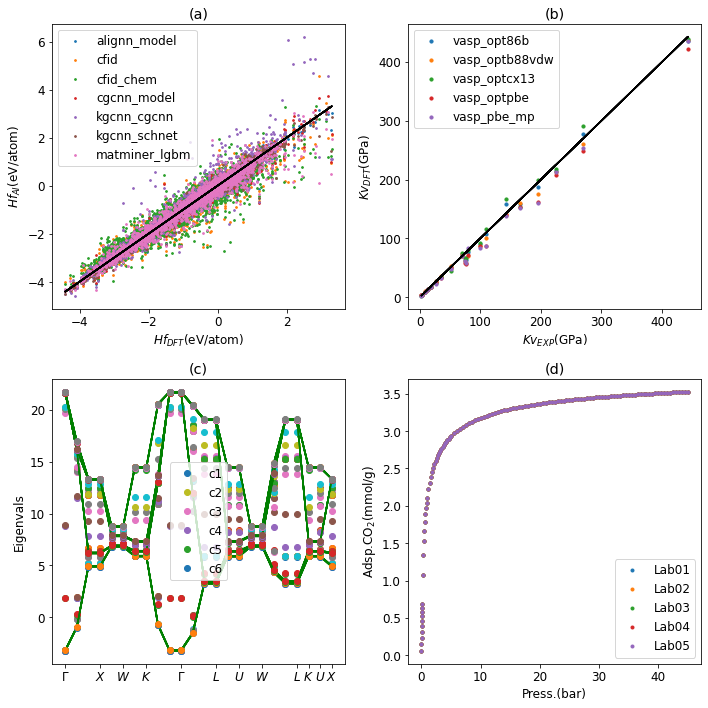

In [19]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(2, 2)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,10))

plt.subplot(the_grid[0, 0])
plt.xlabel('$Hf_{DFT}$(eV/atom)')
plt.ylabel('$Hf_{AI}$(eV/atom)')
plt.title('(a)')
for i,j in ai_form_en.items():
    plt.scatter(j['actual'],j['prediction'],s=3,label=i)
    plt.plot(j['actual'],j['actual'],c='black')
plt.legend()

plt.subplot(the_grid[0, 1])
plt.title('(b)')
plt.ylabel('$Kv_{DFT}$(GPa)')
plt.xlabel('$Kv_{EXP}$(GPa)')
for i,j in es_kv.items():
    plt.scatter(j['actual'],j['prediction'],s=10,label=i)
    plt.plot(j['actual'],j['actual'],c='black')
plt.legend()



plt.subplot(the_grid[1, 0])

for i,j in qc_eig.items():
    actual=np.array(j['actual'].values[0].split(';'),dtype='float').reshape(24,8)
    pred=np.array(j['prediction'].values[0].split(';'),dtype='float').reshape(24,8)
   
    for ii,jj in enumerate(actual.T):
#         if ii==0:
#             plt.plot(jj,'-*',c='g',label='NP')
        plt.plot(jj,'-*',c='g')
        
    for ii,jj in enumerate(pred.T):
#         if ii==0:
#             plt.plot(jj,'*',c='b',label=i.split('qiskit_vqd_SU2_')[1])
        if ii==0:
            plt.plot(jj,'o',label=i.split('qiskit_vqd_SU2_')[1])
        else:
            plt.plot(jj,'o')   
    
kp=[0, 3, 5, 7, 10, 13, 15, 17, 20, 21, 22, 23]
lbls=['$\\Gamma$', '$X$', '$W$', '$K$', '$\\Gamma$', '$L$', '$U$', '$W$', '$L$', '$K$', '$U$', '$X$']
plt.xticks(kp,lbls)
plt.legend()
plt.title('(c)')
plt.ylabel('Eigenvals')



plt.subplot(the_grid[1, 1])

press=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 35, 35.5, 36, 36.5, 37, 37.5, 38, 38.5, 39, 39.5, 40, 40.5, 41, 41.5, 42, 42.5, 43, 43.5, 44, 44.5, 45]

for i,j in exp_co2.items():
    actual=np.array(j['actual'].values[0].split(';'),dtype='float')
    pred=np.array(j['prediction'].values[0].split(';'),dtype='float')
    plt.plot(press,actual,'.',label=i.split('x.')[-1])
plt.legend()
plt.title('(d)')
plt.xlabel('Press.(bar)')
plt.ylabel('Adsp.CO$_2$(mmol/g)')
    
    
plt.tight_layout()
plt.show()
# plt.savefig('results_example.pdf')
# plt.close()

In [24]:
import glob
import zipfile
import numpy as np
import json,os
from jarvis.db.jsonutils import loadjson
from collections import defaultdict
import pandas as pd
from sklearn.metrics import mean_absolute_error, accuracy_score


id_info = defaultdict()
for csv_path in glob.glob("../contributions/*/*.csv.zip"):

    fname = csv_path.split("/")[-1].split(".csv.zip")[0]
    contribution = csv_path.split("/")[-2]
    temp = fname.split("-")
    category = temp[0]
    subcat = temp[1]
    prop = temp[2]
    dataset = temp[3]
    data_split = temp[4]
    metric = temp[-1]
    
    
    
    data_split='test'
    json_name = dataset + "_" + prop + ".json"
    json_path = '../benchmarks/'+category+'/'+subcat+'/'+json_name+'.zip'
    z = zipfile.ZipFile(json_path)
    json_data = json.loads(z.read(json_name))
    if dataset not in id_info:
        id_info[dataset]=[]

        
    if "val" in json_data:  # sometimes just train-test
        data_size = (
            len(json_data["train"])
            + len(json_data["val"])
            + len(json_data["test"])
        )
        for m in list(json_data["train"].keys()):
          
                id_info[dataset].append(m)
        for m in list(json_data["val"].keys()):
           
                id_info[dataset].append(m)
        for m in list(json_data["test"].keys()):
            
                id_info[dataset].append(m)
    else:
        data_size = len(json_data["train"]) + len(json_data["test"])
        for m in list(json_data["train"].keys()):
            
                id_info[dataset].append(m)

        for m in list(json_data["test"].keys()):
           
                id_info[dataset].append(m)

nist_isodb 5 1
dft_3d 4297525 55713
alignn_ff_db 2149777 307111
mlearn_Cu 2930 293
mlearn_Ge 2530 253
mlearn_Li 2700 270
mlearn_Mo 2170 217
mlearn_Ni 3528 294
mlearn_Si 2390 239
qm9_std_jctc 1569948 130829
qmof 20424 20424
snumat 10386 10386
qe_tb 2488722 829574
megnet 138478 69239
hmof 963557 137651
edos_pdos 14243 14243
ssub 5178 1726
stem_2d_image 18300 9150
lj_2d_liquid 2 1
arXiv 908946 87148
pubchem 400500 44500


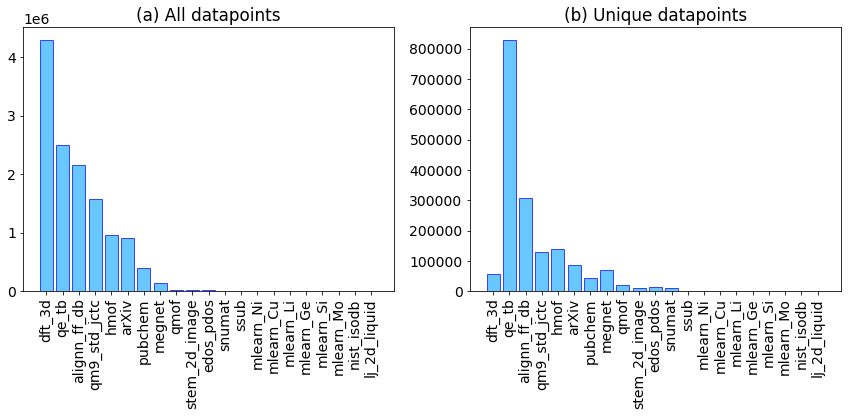

In [65]:
import numpy as np
names=[]
all_ids=[]
unique_ids=[]
for i,j in id_info.items():
    print (i,len(j),len(set(j)))
    names.append(i)
    all_ids.append(len(j))
    unique_ids.append(len(set(j)))
  

order = np.argsort(all_ids)[::-1]
names=np.array(names)[order]
all_ids=np.array(all_ids)[order]
unique_ids=np.array(unique_ids)[order]
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(1, 2)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12,6))

plt.subplot(the_grid[0, 0])
plt.title('(a) All datapoints')
plt.bar(names,all_ids,facecolor = '#2ab0ff', edgecolor='b',alpha=0.7)
plt.xticks(rotation=90)
plt.subplot(the_grid[0, 1])
plt.title('(b) Unique datapoints')
plt.bar(names,unique_ids,facecolor = '#2ab0ff', edgecolor='b',alpha=0.7)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
# plt.savefig('data_dist.pdf')
# plt.close()

In [29]:
from jarvis.db.figshare import data
#names=['dft_2d']
elements=[]
for i in names:
    print (i)
    try:
        dd=data(i)
        if 'atoms' in dd[0]:
            for j in dd:
                for k in j['atoms']['elements']:
                    elements.append(k)
    except:
        pass

dft_3d
Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.
qe_tb
Obtaining QETB dataset 860k...
Reference:https://arxiv.org/abs/2112.11585
Loading the zipfile...
Loading completed.
alignn_ff_db
Obtaining ALIGNN-FF training DB 300k ...
Reference:https://arxiv.org/abs/2209.05554
Loading the zipfile...
Loading completed.
qm9_std_jctc
Obtaining QM9 standardized dataset 130k,From https://doi.org/10.1021/acs.jctc.7b00577,+
Reference:https://www.nature.com/articles/sdata201422
Loading the zipfile...
Loading completed.
hmof
Obtaining hMOF dataset 137k...
Reference:https://doi.org/10.1021/acs.jpcc.6b08729
Loading the zipfile...
Loading completed.
arXiv
Obtaining arXiv dataset 1.8 million...
Reference:https://www.kaggle.com/Cornell-University/arxiv
Loading the zipfile...
Loading completed.
pubchem
megnet
Obtaining MEGNET-3D CFID dataset 69k...
Reference:https

In [30]:
from collections import Counter
all_els = dict(Counter(elements))
total=np.array(list(all_els.values())).sum()
total

27315319

In [31]:
f=open('elements.csv','w')
for i,j in all_els.items():
    line=str(i)+' '+str(100*j/total)+'\n'
    f.write(line)

    #print (i,100*j/total)
f.close()

In [32]:
#Adjusted a bit
from jarvis.analysis.periodic.ptable import plot_ptable_trend
plot_ptable_trend(save_plot=False, input_file='elements.csv')

/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/periodic/ptable.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements.period[i] = "La"
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/pandas-1.2.4-py3.8-linux-x86_64.egg/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/kamalch/miniconda3/envs/gpaw/lib/python3.8/site-packages/jarvis/analysis/periodic/ptable.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "file:///mnt/c/Users/knc6/OneDrive - NIST/KamalLaptop/JARVIS-le ...
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


Figure(id='1004', ...)